# Imports & Visualisation

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
url = 'https://github.com/womega/Covid19_project/blob/master/Training%20and%20tuning/final_dataset.csv?raw=true'
data = pd.read_csv('final_dataset_new.csv')
unlabeled = pd.read_csv('unlabeled_data_nosubdomlvls.csv').drop('Label', axis=1)

In [3]:
data.head()

,Domain,Num_words,Num_chars,Hyphen,Entropy_sdsu,Entropy_nosdsu,Entropy_nosu,Tranco_Rank,Longest_word_ratio,Typos,Freenom_TLD,Other_numbers,Subdomain levels,Label
0,coronavirus-check.com,3,20,1,3.584184,3.572469,3.572469,0,0.523810,0,0,0,0,0
1,covid19tracer.com,5,16,0,3.452820,3.392747,3.392747,0,0.352941,0,0,0,0,0
2,covid-19training.org,5,19,1,3.576618,3.577820,3.577820,0,0.400000,0,0,0,0,0
3,quarantanked.com,4,15,0,3.456565,3.022055,3.022055,0,0.375000,0,0,0,0,0
4,covid19hydroxychloroquine.com,6,28,0,3.865765,3.843856,3.843856,0,0.379310,0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41514 entries, 0 to 41513
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Domain              41514 non-null  object 
 1   Num_words           41514 non-null  int64  
 2   Num_chars           41514 non-null  int64  
 3   Hyphen              41514 non-null  int64  
 4   Entropy_sdsu        41514 non-null  float64
 5   Entropy_nosdsu      41514 non-null  float64
 6   Entropy_nosu        41514 non-null  float64
 7   Tranco_Rank         41514 non-null  int64  
 8   Longest_word_ratio  41514 non-null  float64
 9   Typos               41514 non-null  int64  
 10  Freenom_TLD         41514 non-null  int64  
 11  Other_numbers       41514 non-null  int64  
 12  Subdomain levels    41514 non-null  int64  
 13  Label               41514 non-null  int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 4.4+ MB


## Countplot

Counter({0: 37610, 1: 3904})


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Label', ylabel='count'>

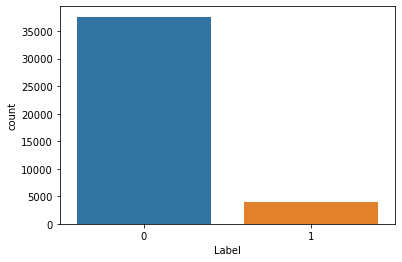

In [5]:
print(Counter(data['Label']))
sns.countplot(data['Label'])

## Histograms

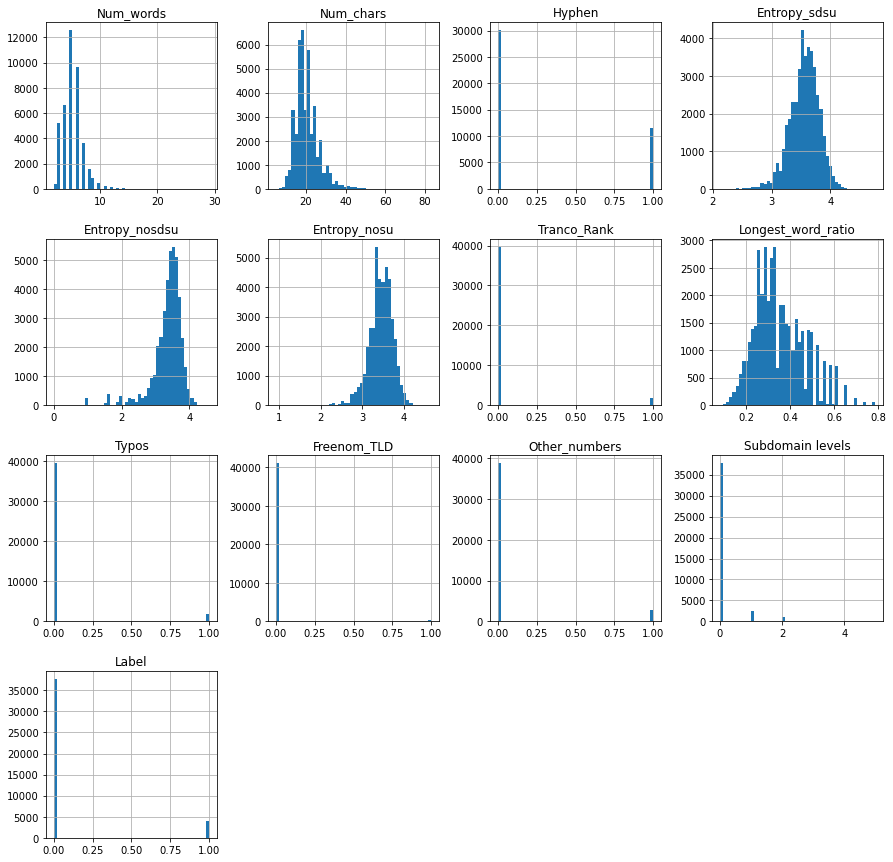

In [6]:
data.hist(bins = 50,figsize = (15,15))
plt.show()

## Correlation heatmap

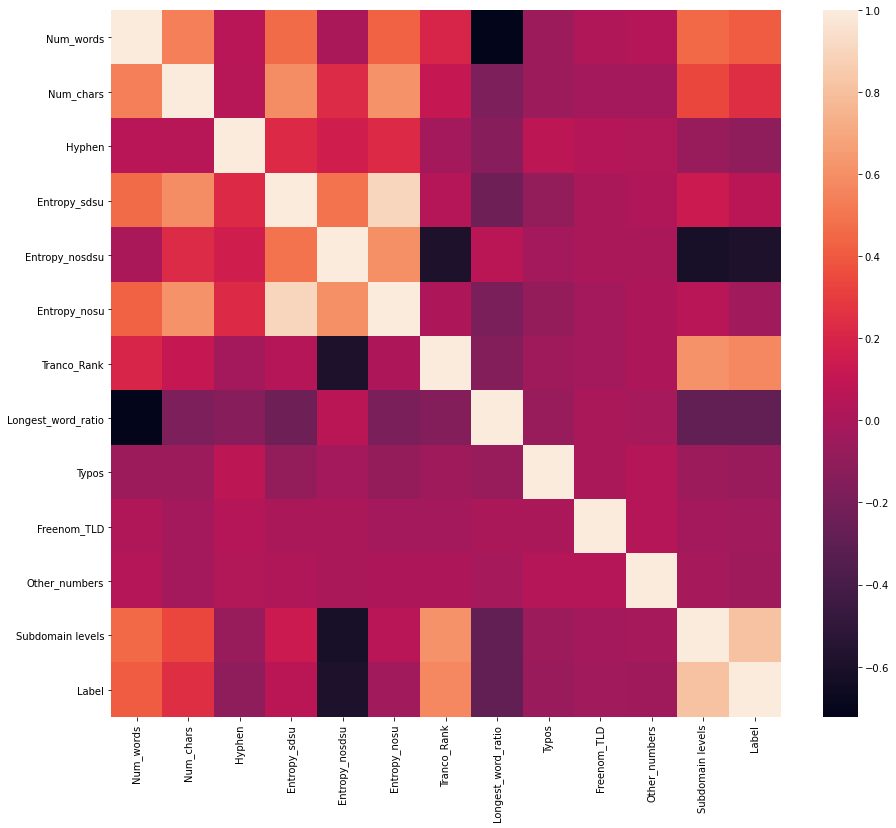

In [7]:
plt.figure(figsize=(15,13))
sns.heatmap(data.corr())
plt.show()

## Decription

In [8]:
data.describe()

,Num_words,Num_chars,Hyphen,Entropy_sdsu,Entropy_nosdsu,Entropy_nosu,Tranco_Rank,Longest_word_ratio,Typos,Freenom_TLD,Other_numbers,Subdomain levels,Label
count,41514.000000,41514.000000,41514.000000,41514.000000,41514.000000,41514.000000,41514.000000,41514.000000,41514.000000,41514.000000,41514.000000,41514.000000,41514.000000
mean,5.318085,20.672279,0.276316,3.558330,3.363972,3.456521,0.042853,0.350677,0.045864,0.009924,0.065592,0.125861,0.094041
std,1.700199,5.902916,0.447181,0.243891,0.449242,0.284773,0.202528,0.114177,0.209193,0.099127,0.247571,0.438147,0.291889
min,2.000000,5.000000,0.000000,2.121928,-0.000000,0.918296,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,17.000000,0.000000,3.408695,3.238901,3.284184,0.000000,0.266667,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,20.000000,0.000000,3.572624,3.454822,3.471354,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,24.000000,1.000000,3.725481,3.625000,3.642150,0.000000,0.423077,0.000000,0.000000,0.000000,0.000000,0.000000
max,29.000000,83.000000,1.000000,4.762261,4.582450,4.667995,1.000000,0.785714,1.000000,1.000000,1.000000,5.000000,1.000000


# Preprocessing

In [9]:
X = data.drop(['Domain', 'Label'], axis=1)
y = data['Label']

In [10]:
X.shape, y.shape

((41514, 12), (41514,))

In [11]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['black', 'red']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
        sns.despine()
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

## Undersampling

### Default NearMiss

In [12]:
#from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss

X_nearmiss, y_nearmiss = NearMiss(sampling_strategy=0.25).fit_sample(X, y)

Counter({0: 15616, 1: 3904})


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


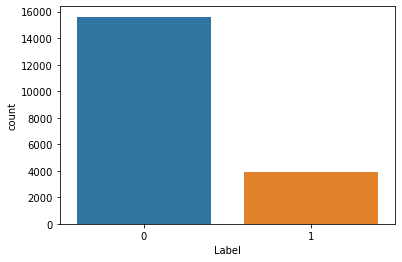

In [13]:
sns.countplot(y_nearmiss)
print(Counter(y_nearmiss))

# Algorithms

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix, make_scorer, auc, roc_curve
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn import tree
import graphviz

In [15]:
def specificity(y_true, y_pred): 
    tn = confusion_matrix(y_true, y_pred)[0, 0]
    fp = confusion_matrix(y_true, y_pred)[0, 1]
    neg = tn + fp
    return tn/neg

#scoring = {'f1', 'precision','accuracy', 'recall', make_scorer(specificity)}

scoring = {'f1': 'f1', 'precision': 'precision', 'accuracy': 'accuracy',
           'sensitivity': 'recall', 'specificity': make_scorer(specificity)}

In [16]:
def append_avgs(dict):
    avgs = []
    stds = []
    for i in dict:
        avg = np.average(dict[i])
        std = np.std(dict[i])
        avgs.append(avg)
        stds.append(std)
    df = pd.DataFrame(dict)
    df.loc[10] = avgs
    df.loc[11] = stds
    return df

def compare_avgs(df1, df2):
    avg_df1 = get_avg(df1)
    avg_df2 = get_avg(df2)
    # avg_ovu = get_avg(ovr_und)
    df = pd.concat([avg_df1, avg_df2], ignore_index=True)
    return df


def get_avg(df):
    # print(df.iloc[[10]].reset_index(drop=True))
    return df.iloc[[10]].reset_index(drop=True)

def draw(dict):
    folds = list(range(0,10))
    plt.figure(figsize=(20,10))
    plt.grid(True)
    plt.plot(folds,dict['test_accuracy'][:10],label='accuracy',marker='o', linestyle='--',)
    plt.plot(folds,dict['test_precision'][:10],label = 'precision',marker='o', linestyle='--',)
    plt.plot(folds,dict['test_f1'][:10],label = 'f1 score',marker='o', linestyle='--',)
    plt.plot(folds,dict['test_sensitivity'][:10],label='Recall',marker='o', linestyle='--',)
    plt.plot(folds,dict['test_specificity'][:10],label='Specificity',marker='o', linestyle='--',)
    plt.xlabel('Fold')
    plt.ylabel('Performance')
    plt.xticks(folds, folds)
    plt.legend()
    plt.show()

## Decision Tree

In [17]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

In [18]:
# idx = np.arrange(y.shape[0])
# X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_nearmiss, y_nearmiss, idx, stratify = y, test_size=0.333333, random_state=100)

In [19]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_nearmiss, y_nearmiss, test_size=0.333333, random_state=100)

### Baseline

#### Previously Undersampled

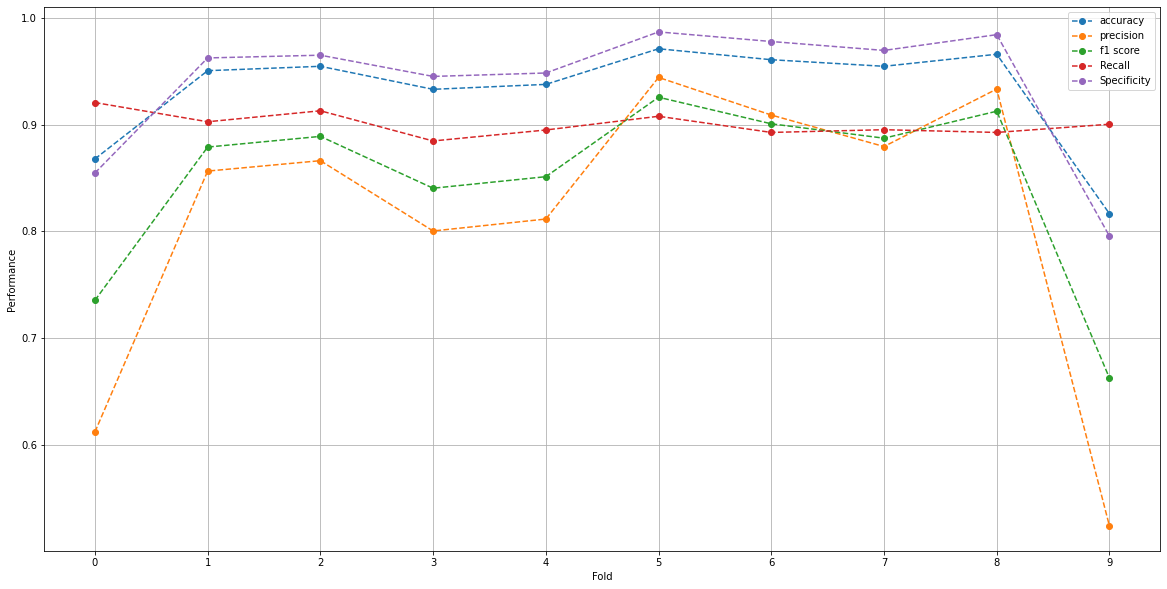

In [20]:
clf = make_pipeline(StandardScaler(), DecisionTreeClassifier())
dtc_sc_pr = cross_validate(clf, X_nearmiss, y_nearmiss, cv = StratifiedKFold(n_splits=10), scoring=scoring)
dtc_sc_pr = append_avgs(dtc_sc_pr)
draw(dtc_sc_pr)

In [21]:
dtc_sc_pr

,fit_time,score_time,test_f1,test_precision,test_accuracy,test_sensitivity,test_specificity
0,0.059330,0.010622,0.735656,0.612628,0.867828,0.920513,0.854673
1,0.073067,0.011400,0.878901,0.856448,0.950307,0.902564,0.962228
2,0.050604,0.008215,0.888889,0.866180,0.954406,0.912821,0.964789
3,0.053916,0.008573,0.840438,0.800464,0.932889,0.884615,0.944942
4,0.053867,0.008040,0.851220,0.811628,0.937500,0.894872,0.948143
5,0.053684,0.008138,0.925490,0.944000,0.970799,0.907692,0.986556
6,0.050641,0.008066,0.900645,0.908854,0.960553,0.892583,0.977578
7,0.053082,0.008115,0.887199,0.879397,0.954406,0.895141,0.969250
8,0.055446,0.009295,0.912418,0.933155,0.965676,0.892583,0.983985
9,0.061710,0.008807,0.662900,0.524590,0.816598,0.900256,0.795644


##### Single Model

In [79]:
# instantiate the model 
dtc = make_pipeline(StandardScaler(), DecisionTreeClassifier())
# fit the model 

dtc.fit(X_train_1, y_train_1)

dtc_test_pred = dtc.predict(X_test_1)

print("The DTC's classification report:\n\n",classification_report(y_test_1, dtc_test_pred))
print("The DTC's confusion matrix:\n\n",confusion_matrix(y_test_1, dtc_test_pred))
print("Recall: ", recall_score(y_test_1, dtc_test_pred))
print("Accuracy: ", accuracy_score(y_test_1, dtc_test_pred))
print("Specificity: ", specificity(y_test_1, dtc_test_pred))
print("F-1: ", f1_score(y_test_1, dtc_test_pred))

The DTC's classification report:

               precision    recall  f1-score   support

           0       0.98      0.98      0.98      5235
           1       0.90      0.90      0.90      1272

    accuracy                           0.96      6507
   macro avg       0.94      0.94      0.94      6507
weighted avg       0.96      0.96      0.96      6507

The DTC's confusion matrix:

 [[5106  129]
 [ 128 1144]]
Recall:  0.89937106918239
Accuracy:  0.9605040725372676
Specificity:  0.9753581661891118
F-1:  0.8990176817288801


In [23]:
dtc_preds = dtc.predict(unlabeled)

In [ ]:
dot_data = tree.export_graphviz(dtc, out_file=None,
                                feature_names=X.columns,
                                class_names=["whitelist","malicious"],
                                filled=True, rounded=True, 
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render('test-output/decision_tree1.gv', view=True)

In [ ]:
graph

###### Feature importance

In [ ]:
importances = dtc.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [30]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size = 0.33, random_state=42)

In [31]:
# build normal model
pipeline = make_pipeline(DecisionTreeClassifier())
model = pipeline.fit(X_train_2, y_train_2)
prediction = model.predict(X_test_2)

# build model with undersampling
nearmiss_pipeline = make_pipeline_imb(NearMiss(sampling_strategy=0.25), DecisionTreeClassifier())
nearmiss_model = nearmiss_pipeline.fit(X_train_2, y_train_2)
nearmiss_prediction = nearmiss_model.predict(X_test_2)

In [32]:
from imblearn.metrics import classification_report_imbalanced

In [33]:
print(classification_report_imbalanced(y_test_2, nearmiss_prediction))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.65      0.89      0.95      0.75      0.92      0.84      1229
          1       0.99      0.95      0.89      0.97      0.92      0.85     11244

avg / total       0.95      0.94      0.90      0.95      0.92      0.85     12473



In [34]:
print(accuracy_score(y_test_2, nearmiss_prediction))

0.9415537561132046


#### Undersampled in pipeline

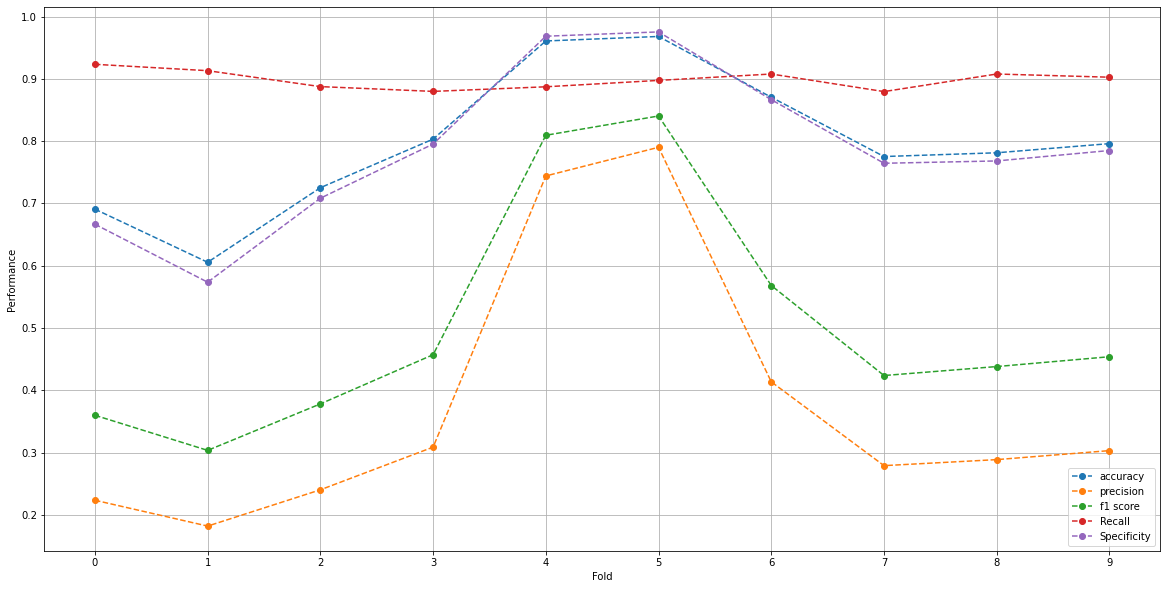

In [80]:
clf = make_pipeline_imb(NearMiss(sampling_strategy=0.25), StandardScaler(), DecisionTreeClassifier())
dtc_sc = cross_validate(clf, X, y, cv=10, scoring=scoring)
dtc_sc = append_avgs(dtc_sc)

draw(dtc_sc)

#### Compare averages

In [81]:
compare_avgs(dtc_sc, dtc_sc_pr)

,fit_time,score_time,test_f1,test_precision,test_accuracy,test_sensitivity,test_specificity
0,0.334233,0.014605,0.503249,0.377341,0.797619,0.898563,0.787131
1,0.066863,0.008816,0.859934,0.837858,0.938422,0.894222,0.949481


## Random Forest

In [22]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

### Baseline

#### Previously Undersampled

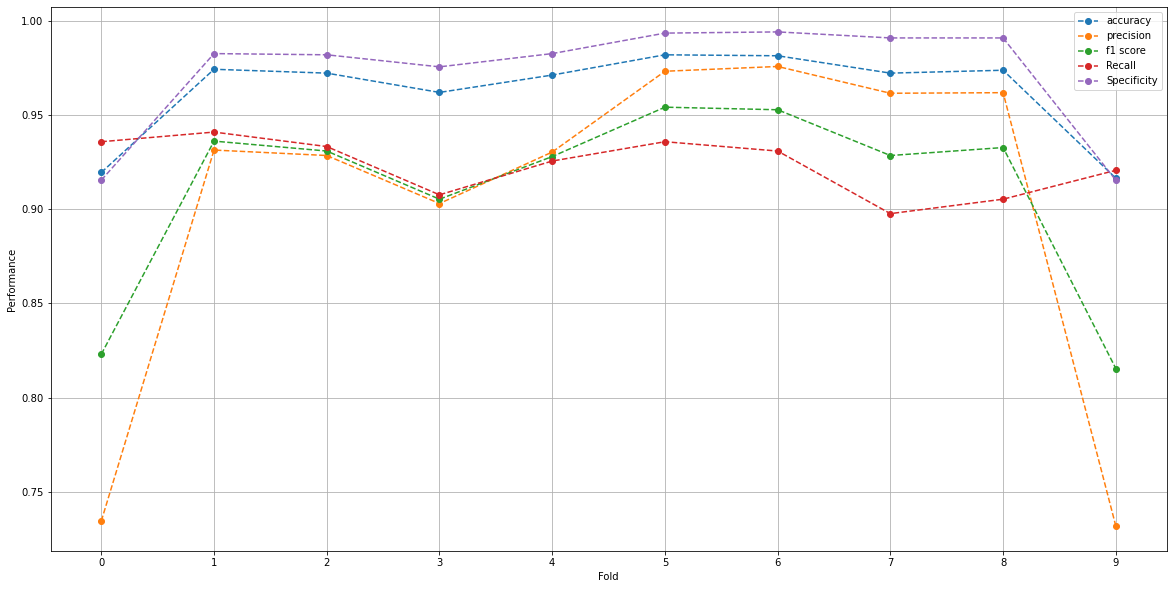

In [23]:
clf = make_pipeline(StandardScaler(), RandomForestClassifier())
rfc_sc_pr = cross_validate(clf, X_nearmiss, y_nearmiss, cv=10, scoring=scoring)
rfc_sc_pr = append_avgs(rfc_sc_pr)
draw(rfc_sc_pr)

In [24]:
rfc_sc_pr

,fit_time,score_time,test_f1,test_precision,test_accuracy,test_sensitivity,test_specificity
0,1.252975,0.037437,0.822999,0.734406,0.919570,0.935897,0.915493
1,1.132027,0.035216,0.936224,0.931472,0.974385,0.941026,0.982714
2,1.123625,0.035890,0.930946,0.928571,0.972336,0.933333,0.982074
3,1.115557,0.047539,0.905371,0.903061,0.962090,0.907692,0.975672
4,1.160730,0.034159,0.928021,0.930412,0.971311,0.925641,0.982714
5,1.211342,0.033841,0.954248,0.973333,0.982070,0.935897,0.993598
6,1.158603,0.036209,0.952880,0.975871,0.981557,0.930946,0.994234
7,1.192116,0.035534,0.928571,0.961644,0.972336,0.897698,0.991031
8,1.182338,0.032877,0.932806,0.961957,0.973873,0.905371,0.991031
9,1.174464,0.034549,0.815402,0.731707,0.916496,0.920716,0.915439


##### Single Model

In [113]:
# instantiate the model 
rfc = make_pipeline(StandardScaler(), RandomForestClassifier())
# fit the model 

rfc.fit(X_train_1, y_train_1)

rfc_test_pred = rfc.predict(X_test_1)

print("The RFC's classification report:\n\n",classification_report(y_test_1, rfc_test_pred))
print("The RFC's confusion matrix:\n\n",confusion_matrix(y_test_1, rfc_test_pred))
print("Recall: ", recall_score(y_test_1, rfc_test_pred))
print("Accuracy: ", accuracy_score(y_test_1, rfc_test_pred))
print("Specificity: ", specificity(y_test_1, rfc_test_pred))
print("F-1: ", f1_score(y_test_1, rfc_test_pred))

The RFC's classification report:

               precision    recall  f1-score   support

           0       0.98      0.98      0.98      5235
           1       0.93      0.91      0.92      1272

    accuracy                           0.97      6507
   macro avg       0.95      0.95      0.95      6507
weighted avg       0.97      0.97      0.97      6507

The RFC's confusion matrix:

 [[5150   85]
 [ 115 1157]]
Recall:  0.9095911949685535
Accuracy:  0.9692638696788074
Specificity:  0.9837631327602674
F-1:  0.9204455051710422


In [42]:
rfc_preds = rfc.predict(unlabeled)

###### Feature importance

Feature ranking:
1. Entropy_nosdsu (0.382903)
2. Tranco_Rank (0.140803)
3. Num_words (0.121947)
4. Entropy_nosu (0.097573)
5. Num_chars (0.094598)
6. Longest_word_ratio (0.079891)
7. Entropy_sdsu (0.068514)
8. Other_numbers (0.005783)
9. Hyphen (0.005593)
10. Typos (0.002395)
11. Freenom_TLD (0.000000)


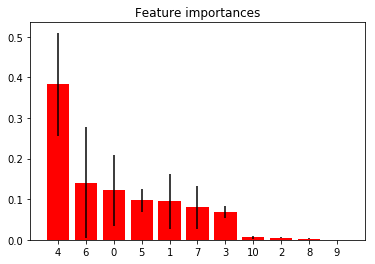

In [38]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

#### Undersampled in pipeline

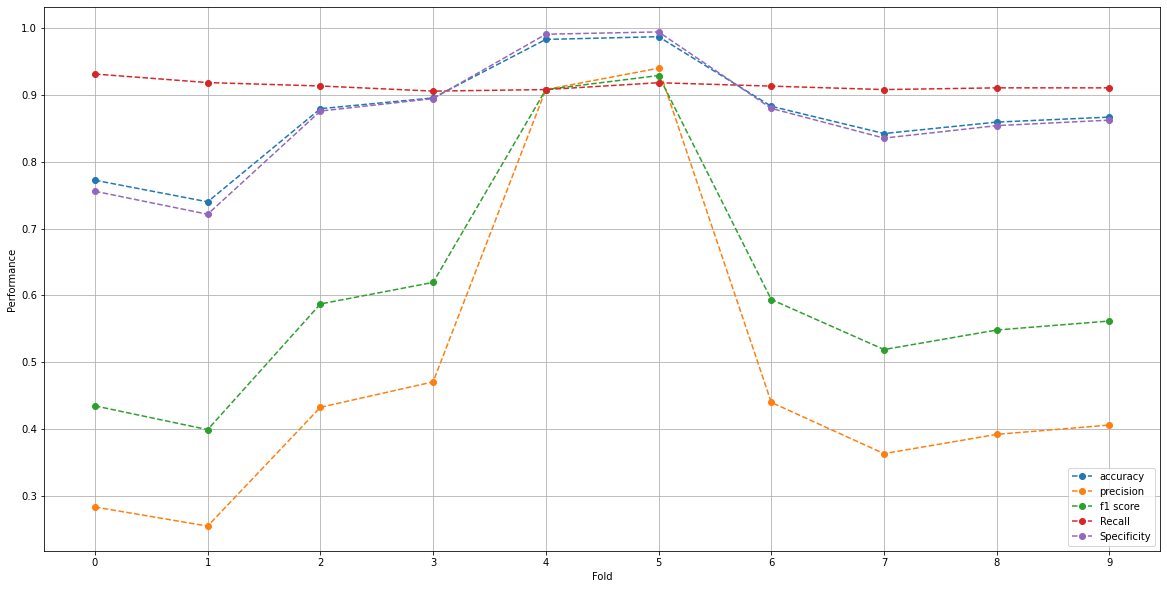

In [86]:
clf = make_pipeline_imb(NearMiss(sampling_strategy=0.25), StandardScaler(), RandomForestClassifier())
rfc_sc = cross_validate(clf, X, y, cv=10, scoring=scoring)
rfc_sc = append_avgs(rfc_sc)

draw(rfc_sc)

#### Compare averages

In [87]:
compare_avgs(rfc_sc, rfc_sc_pr)

,fit_time,score_time,test_f1,test_precision,test_accuracy,test_sensitivity,test_specificity
0,1.841608,0.073301,0.610003,0.489160,0.870603,0.913419,0.866153
1,1.455782,0.042334,0.909437,0.916876,0.962859,0.906773,0.976886


## XGBoost

In [25]:
# XGboost classifier
from xgboost import XGBClassifier, plot_importance

### Baseline

#### Previously Undersampled

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:42:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:42:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:42:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:42:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:42:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:42:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:42:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:42:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:42:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:42:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


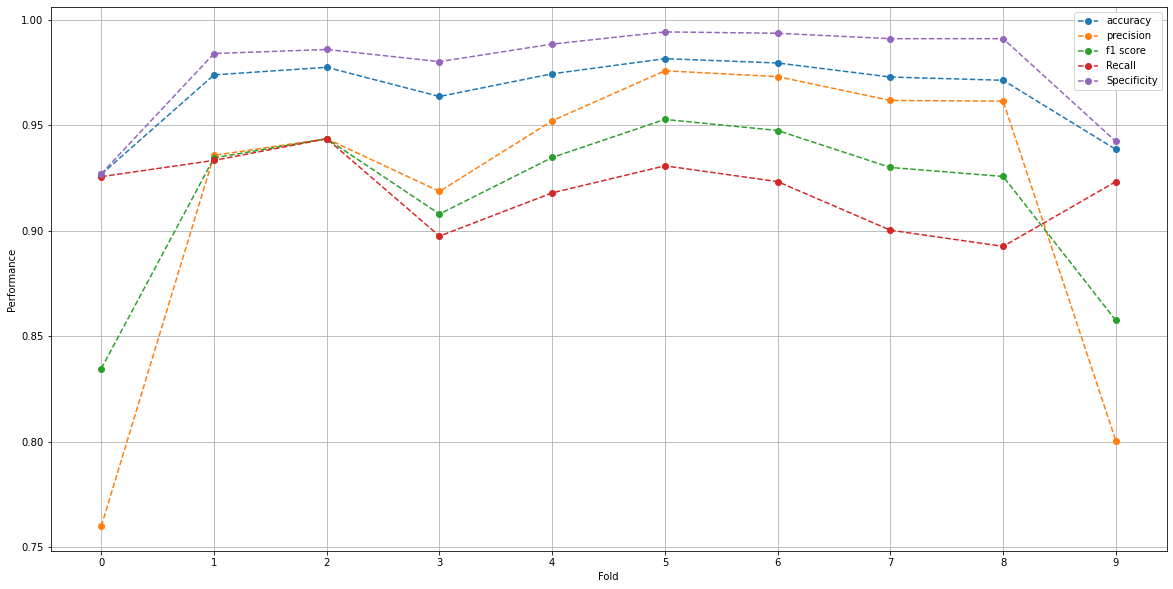

In [26]:
clf = make_pipeline(StandardScaler(), XGBClassifier())
xgb_sc_pr = cross_validate(clf, X_nearmiss, y_nearmiss, cv=10, scoring=scoring)
xgb_sc_pr = append_avgs(xgb_sc_pr)
draw(xgb_sc_pr)

In [27]:
xgb_sc_pr

,fit_time,score_time,test_f1,test_precision,test_accuracy,test_sensitivity,test_specificity
0,1.127441,0.013009,0.834682,0.760000,0.926742,0.925641,0.927017
1,0.923619,0.013766,0.934531,0.935733,0.973873,0.933333,0.983995
2,0.871592,0.012306,0.943590,0.943590,0.977459,0.943590,0.985915
3,0.882041,0.013279,0.907912,0.918635,0.963627,0.897436,0.980154
4,0.829991,0.012301,0.934726,0.952128,0.974385,0.917949,0.988476
5,0.840114,0.012453,0.952756,0.975806,0.981557,0.930769,0.994238
6,0.842373,0.013339,0.947507,0.973046,0.979508,0.923274,0.993594
7,0.865600,0.012432,0.929987,0.961749,0.972848,0.900256,0.991031
8,0.840432,0.012111,0.925729,0.961433,0.971311,0.892583,0.991031
9,0.867989,0.013086,0.857482,0.800443,0.938525,0.923274,0.942345


##### Single Model

In [112]:
# instantiate the model 
xgb = make_pipeline(StandardScaler(), XGBClassifier())
# fit the model 

xgb.fit(X_train_1, y_train_1)

xgb_test_pred = rfc.predict(X_test_1)

print("The XGB's classification report:\n\n",classification_report(y_test_1, xgb_test_pred))
print("The XGB's confusion matrix:\n\n",confusion_matrix(y_test_1, xgb_test_pred))
print("Recall: ", recall_score(y_test_1, xgb_test_pred))
print("Accuracy: ", accuracy_score(y_test_1, xgb_test_pred))
print("Specificity: ", specificity(y_test_1, xgb_test_pred))
print("F-1: ", f1_score(y_test_1, xgb_test_pred))

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:24:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The XGB's classification report:

               precision    recall  f1-score   support

           0       0.98      0.98      0.98      5235
           1       0.93      0.90      0.92      1272

    accuracy                           0.97      6507
   macro avg       0.95      0.94      0.95      6507
weighted avg       0.97      0.97      0.97      6507

The XGB's confusion matrix:

 [[5151   84]
 [ 124 1148]]
Recall:  0.9025157232704403
Accuracy:  0.9680344244659598
Specificity:  0.9839541547277937
F-1:  0.9169329073482428


In [50]:
xgb_preds = xgb.predict(unlabeled)

###### Feature importance

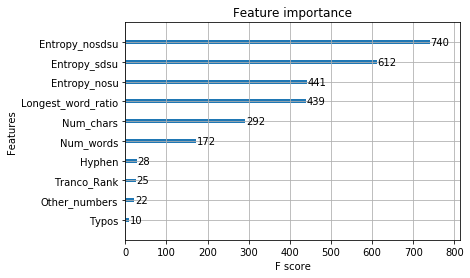

In [44]:
plot_importance(xgb)

Feature ranking:
1. Tranco_Rank (0.377101)
2. Num_words (0.208959)
3. Entropy_nosdsu (0.159639)
4. Entropy_nosu (0.073894)
5. Typos (0.047118)
6. Other_numbers (0.040552)
7. Hyphen (0.028086)
8. Num_chars (0.024492)
9. Entropy_sdsu (0.022992)
10. Longest_word_ratio (0.017167)
11. Freenom_TLD (0.000000)


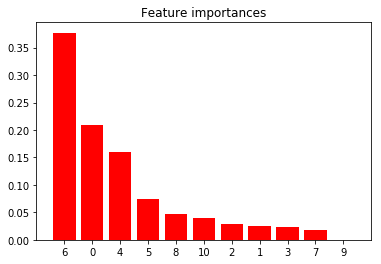

In [45]:
importances = xgb.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

#### Undersampled in pipeline

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:15:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:15:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:15:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:15:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:15:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:15:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:15:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:15:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:15:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:15:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


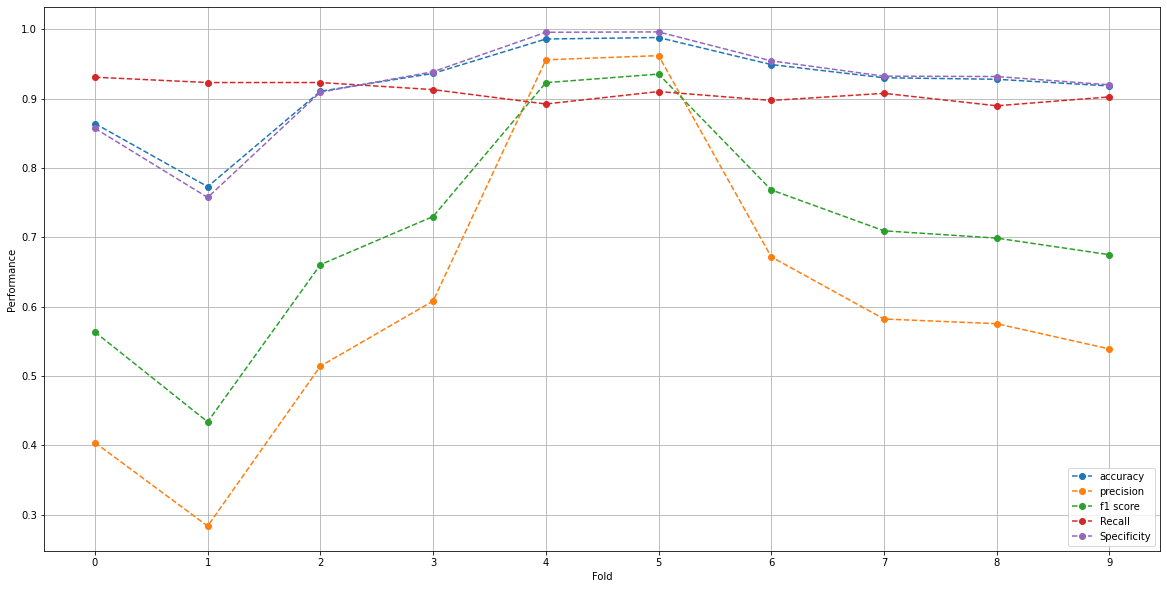

In [92]:
clf = make_pipeline_imb(NearMiss(sampling_strategy=0.25), StandardScaler(), XGBClassifier())
xgb_sc = cross_validate(clf, X, y, cv=10, scoring=scoring)
xgb_sc = append_avgs(xgb_sc)

draw(xgb_sc)

#### Compare averages

In [93]:
compare_avgs(xgb_sc, xgb_sc_pr)

,fit_time,score_time,test_f1,test_precision,test_accuracy,test_sensitivity,test_specificity
0,1.292702,0.022534,0.709818,0.609663,0.918418,0.909054,0.919383
1,1.199030,0.017812,0.912849,0.921589,0.964447,0.908309,0.978487


## GBC

In [28]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

### Baseline

#### Previously Undersampled

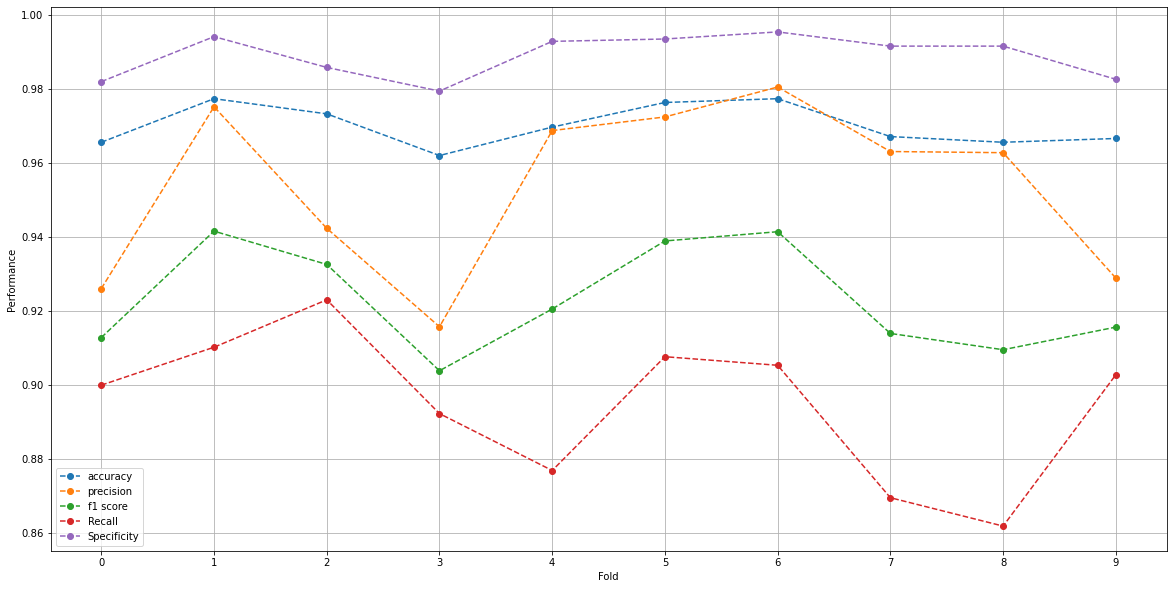

In [29]:
clf = make_pipeline(StandardScaler(), GradientBoostingClassifier())
gb_sc_pr = cross_validate(clf, X_nearmiss, y_nearmiss, cv=10, scoring=scoring)
gb_sc_pr = append_avgs(gb_sc_pr)
draw(gb_sc_pr)

In [30]:
gb_sc_pr

,fit_time,score_time,test_f1,test_precision,test_accuracy,test_sensitivity,test_specificity
0,1.416478,0.011476,0.912874,0.926121,0.965676,0.900000,0.982074
1,1.342608,0.010133,0.941645,0.975275,0.977459,0.910256,0.994238
2,1.339469,0.010293,0.932642,0.942408,0.973361,0.923077,0.985915
3,1.341676,0.011233,0.903896,0.915789,0.962090,0.892308,0.979513
4,1.361789,0.010367,0.920592,0.968839,0.969775,0.876923,0.992958
5,1.349379,0.010282,0.938992,0.972527,0.976434,0.907692,0.993598
6,1.332686,0.009989,0.941489,0.980609,0.977459,0.905371,0.995516
7,1.319580,0.010093,0.913978,0.963173,0.967213,0.869565,0.991672
8,1.335689,0.010561,0.909582,0.962857,0.965676,0.861893,0.991672
9,1.308310,0.010210,0.915694,0.928947,0.966701,0.902813,0.982703


##### Single Model

In [97]:
# instantiate the model 
gbc = make_pipeline(StandardScaler(), GradientBoostingClassifier())
# fit the model 

gbc.fit(X_train_1, y_train_1)

gbc_test_pred = gbc.predict(X_test_1)

print("The GBC's classification report:\n\n",classification_report(y_test_1, gbc_test_pred))
print("The GBC's confusion matrix:\n\n",confusion_matrix(y_test_1, gbc_test_pred))
print("Recall: ", recall_score(y_test_1, gbc_test_pred))
print("Accuracy: ", accuracy_score(y_test_1, gbc_test_pred))
print("Specificity: ", specificity(y_test_1, gbc_test_pred))
print("F-1: ", f1_score(y_test_1, gbc_test_pred))

The GBC's classification report:

               precision    recall  f1-score   support

           0       0.96      0.99      0.98      5235
           1       0.95      0.85      0.90      1272

    accuracy                           0.96      6507
   macro avg       0.96      0.92      0.94      6507
weighted avg       0.96      0.96      0.96      6507

The GBC's confusion matrix:

 [[5181   54]
 [ 192 1080]]
Recall:  0.8490566037735849
Accuracy:  0.9621945597049332
Specificity:  0.9896848137535816
F-1:  0.8977556109725686


In [60]:
gbc_preds = gbc.predict(unlabeled)

###### Feature importance

Feature ranking:
1. Entropy_nosdsu (0.598842)
2. Entropy_nosu (0.164506)
3. Num_words (0.140546)
4. Tranco_Rank (0.033561)
5. Num_chars (0.021588)
6. Entropy_sdsu (0.020052)
7. Longest_word_ratio (0.015650)
8. Other_numbers (0.003830)
9. Typos (0.001167)
10. Hyphen (0.000258)
11. Freenom_TLD (0.000000)


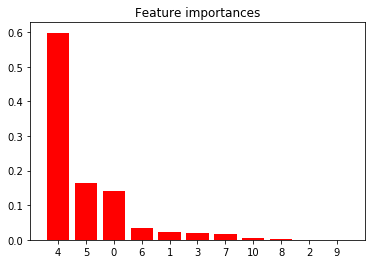

In [50]:
importances = gbc.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

#### Undersampled in pipeline

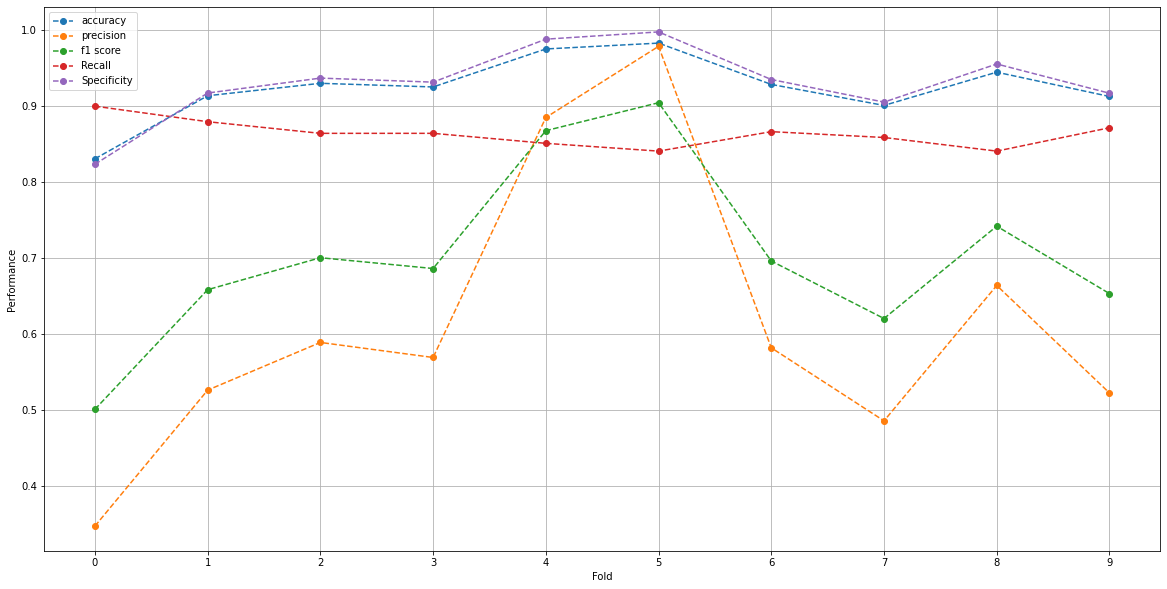

In [98]:
clf = make_pipeline_imb(NearMiss(sampling_strategy=0.25), StandardScaler(), GradientBoostingClassifier())
gb_sc = cross_validate(clf, X, y, cv=10, scoring=scoring)
gb_sc = append_avgs(gb_sc)

draw(gb_sc)

#### Compare averages

In [99]:
compare_avgs(gb_sc, gb_sc_pr)

,fit_time,score_time,test_f1,test_precision,test_accuracy,test_sensitivity,test_specificity
0,1.627693,0.019203,0.703056,0.614861,0.924823,0.863972,0.931135
1,1.735335,0.015542,0.900173,0.943988,0.961732,0.861435,0.986809


## Perceptrons

In [31]:
from sklearn.neural_network import MLPClassifier

### Baseline

#### Previously Undersampled

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


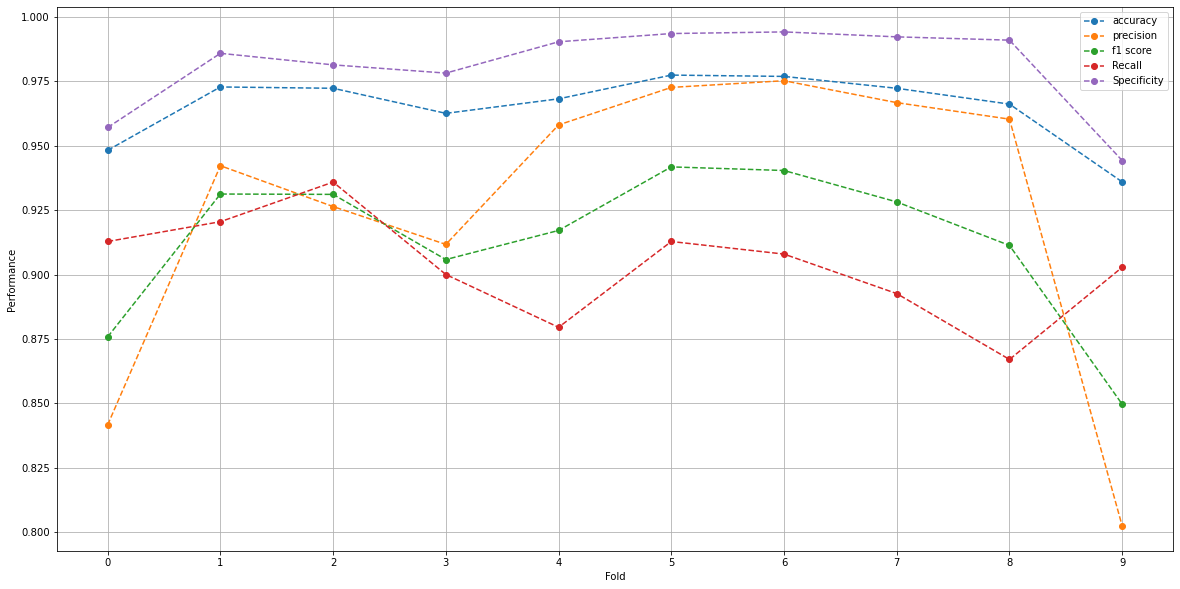

In [32]:
clf = make_pipeline(StandardScaler(), MLPClassifier())
mlp_sc_pr = cross_validate(clf, X_nearmiss, y_nearmiss, cv=10, scoring=scoring)
mlp_sc_pr = append_avgs(mlp_sc_pr)
draw(mlp_sc_pr)

In [33]:
mlp_sc_pr

,fit_time,score_time,test_f1,test_precision,test_accuracy,test_sensitivity,test_specificity
0,15.920059,0.010256,0.875769,0.841608,0.948258,0.912821,0.957106
1,8.328301,0.008622,0.931258,0.942257,0.972848,0.920513,0.985915
2,7.599042,0.008884,0.931122,0.926396,0.972336,0.935897,0.981434
3,11.394332,0.008399,0.905806,0.911688,0.962602,0.900000,0.978233
4,9.328214,0.009455,0.917112,0.958101,0.968238,0.879487,0.990397
5,12.248725,0.009082,0.941799,0.972678,0.977459,0.912821,0.993598
6,10.431481,0.010791,0.940397,0.975275,0.976947,0.907928,0.994234
7,7.261688,0.008659,0.928191,0.966759,0.972336,0.892583,0.992313
8,5.841370,0.009141,0.911290,0.960340,0.966189,0.867008,0.991031
9,7.393288,0.008851,0.849579,0.802273,0.935963,0.902813,0.944266


##### Single Model

In [103]:
# instantiate the model 
mlp = make_pipeline(StandardScaler(), MLPClassifier())
# fit the model 

mlp.fit(X_train_1, y_train_1)

mlp_test_pred = mlp.predict(X_test_1)

print("The MLP's classification report:\n\n", classification_report(y_test_1, mlp_test_pred))
print("The MLP's confusion matrix:\n\n", confusion_matrix(y_test_1, mlp_test_pred))
print("Recall: ", recall_score(y_test_1, mlp_test_pred))
print("Accuracy: ", accuracy_score(y_test_1, mlp_test_pred))
print("Specificity: ", specificity(y_test_1, mlp_test_pred))
print("F-1: ", f1_score(y_test_1, mlp_test_pred))

The MLP's classification report:

               precision    recall  f1-score   support

           0       0.97      0.99      0.98      5235
           1       0.95      0.88      0.92      1272

    accuracy                           0.97      6507
   macro avg       0.96      0.94      0.95      6507
weighted avg       0.97      0.97      0.97      6507

The MLP's confusion matrix:

 [[5181   54]
 [ 148 1124]]
Recall:  0.8836477987421384
Accuracy:  0.9689565083755955
Specificity:  0.9896848137535816
F-1:  0.9175510204081633


In [67]:
mlp_preds = mlp.predict(unlabeled)

#### Undersampled in pipeline

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multi

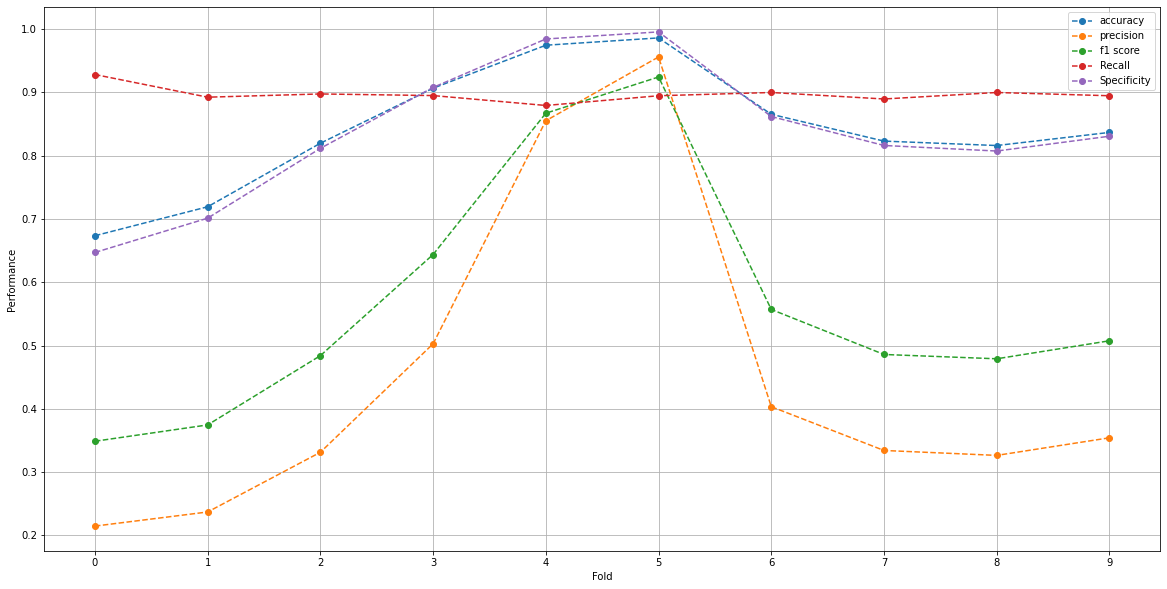

In [104]:
clf = make_pipeline_imb(NearMiss(sampling_strategy=0.25), StandardScaler(), MLPClassifier())
mlp_sc = cross_validate(clf, X, y, cv=10, scoring=scoring)
mlp_sc = append_avgs(mlp_sc)

draw(mlp_sc)

#### Compare averages

In [105]:
compare_avgs(mlp_sc, mlp_sc_pr)

,fit_time,score_time,test_f1,test_precision,test_accuracy,test_sensitivity,test_specificity
0,15.491906,0.017848,0.567336,0.451630,0.842252,0.897279,0.836533
1,16.827268,0.010935,0.910779,0.932445,0.964652,0.892681,0.982648


## SVM

In [34]:
from sklearn.svm import SVC

### Baseline

#### Previously Undersampled

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

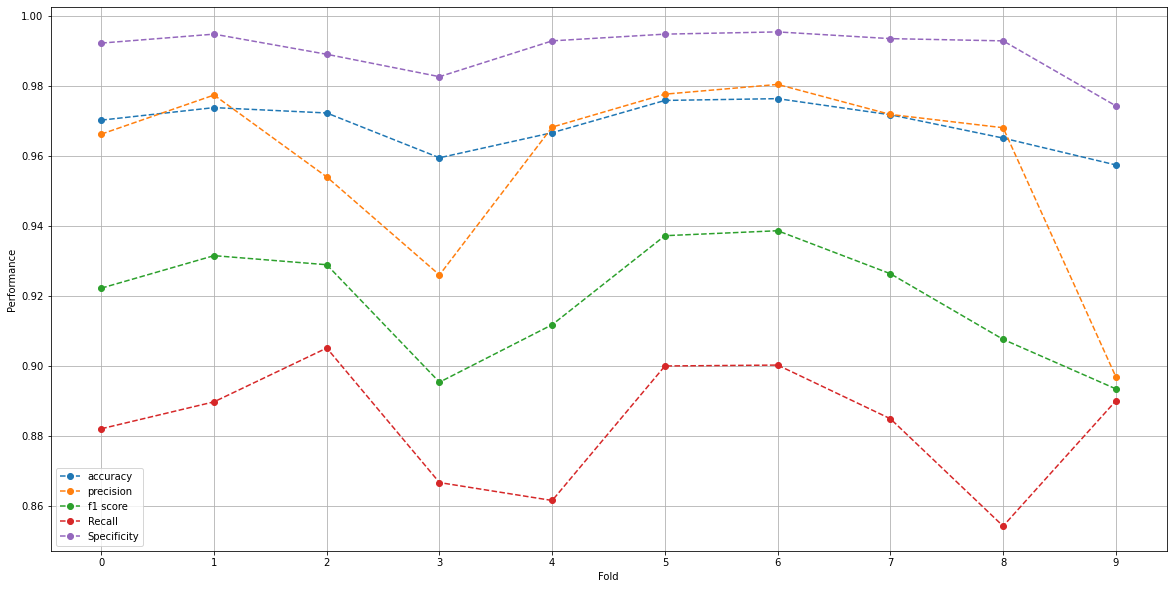

In [35]:
clf = make_pipeline(StandardScaler(), SVC(verbose=1))
svc_sc_pr = cross_validate(clf, X_nearmiss, y_nearmiss, cv=10, scoring=scoring)
svc_sc_pr = append_avgs(svc_sc_pr)
draw(svc_sc_pr)

In [36]:
svc_sc_pr

,fit_time,score_time,test_f1,test_precision,test_accuracy,test_sensitivity,test_specificity
0,1.413623,0.060019,0.922252,0.966292,0.970287,0.882051,0.992318
1,1.426273,0.057728,0.931544,0.977465,0.973873,0.889744,0.994878
2,1.276180,0.056900,0.928947,0.954054,0.972336,0.905128,0.989117
3,1.230731,0.058156,0.895364,0.926027,0.959529,0.866667,0.982714
4,1.359094,0.060388,0.911805,0.968300,0.966701,0.861538,0.992958
5,1.323707,0.058564,0.937250,0.977716,0.975922,0.900000,0.994878
6,1.364460,0.058807,0.938667,0.980501,0.976434,0.900256,0.995516
7,1.300935,0.058469,0.926372,0.971910,0.971824,0.884910,0.993594
8,1.308551,0.057013,0.907609,0.968116,0.965164,0.854220,0.992953
9,1.352245,0.057922,0.893453,0.896907,0.957480,0.890026,0.974375


##### Single Model

In [109]:
# instantiate the model 
svc = make_pipeline(StandardScaler(), SVC())
# fit the model 

svc.fit(X_train_1, y_train_1)

svc_test_pred = svc.predict(X_test_1)

print("The SVM's classification report:\n\n", classification_report(y_test_1, svc_test_pred))
print("The SVM's confusion matrix:\n\n", confusion_matrix(y_test_1, svc_test_pred))
print("Recall: ", recall_score(y_test_1, svc_test_pred))
print("Accuracy: ", accuracy_score(y_test_1, svc_test_pred))
print("Specificity: ", specificity(y_test_1, svc_test_pred))
print("F-1: ", f1_score(y_test_1, svc_test_pred))

The SVM's classification report:

               precision    recall  f1-score   support

           0       0.96      0.99      0.98      5235
           1       0.96      0.85      0.90      1272

    accuracy                           0.96      6507
   macro avg       0.96      0.92      0.94      6507
weighted avg       0.96      0.96      0.96      6507

The SVM's confusion matrix:

 [[5194   41]
 [ 191 1081]]
Recall:  0.8498427672955975
Accuracy:  0.9643460888274167
Specificity:  0.9921680993314231
F-1:  0.9030910609857978


In [74]:
svc_preds = svc.predict(unlabeled)

###### Feature importance

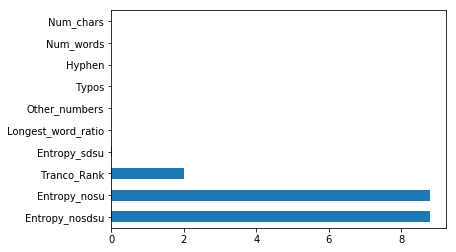

In [58]:
pd.Series(abs(svc.coef_[0]), index=X.columns).nlargest(10).plot(kind='barh')

In [59]:
svc.coef_

array([[-3.20340983e-04, -1.01057597e-04, -5.61028771e-04,
        -5.18768008e-03,  8.79340706e+00, -8.78641478e+00,
        -2.00187143e+00,  2.31415328e-03, -2.02467499e-03,
         0.00000000e+00, -2.05121148e-03]])

#### Undersampled in pipeline

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

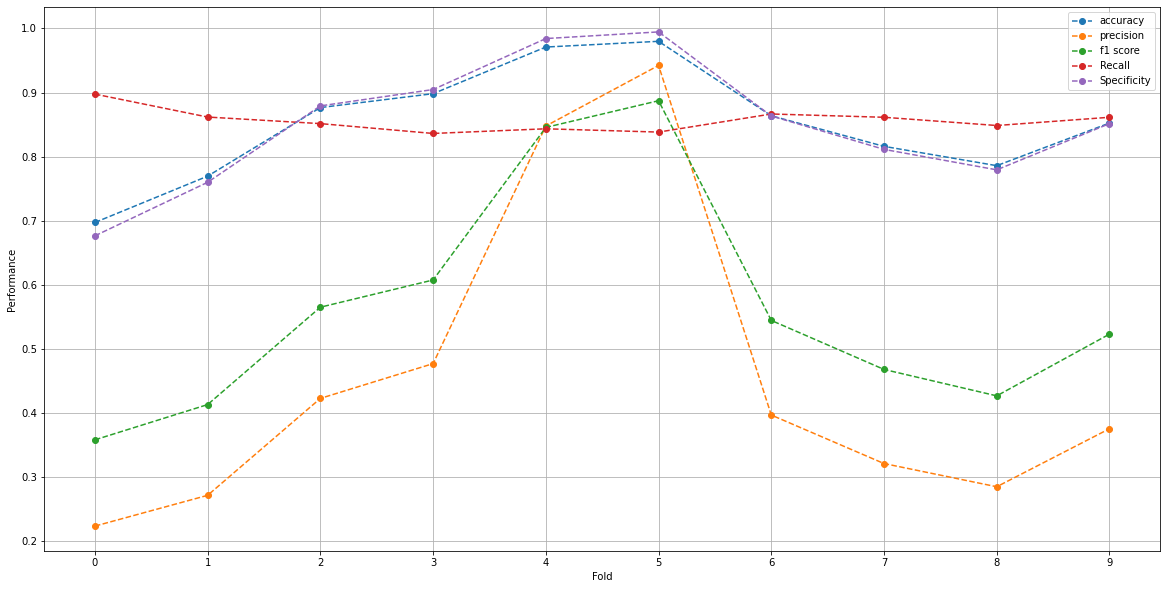

In [110]:
clf = make_pipeline_imb(NearMiss(sampling_strategy=0.25), StandardScaler(), SVC(verbose=1))
svc_sc = cross_validate(clf, X, y, cv=10, scoring=scoring)
svc_sc = append_avgs(svc_sc)

draw(svc_sc)

#### Compare averages

In [111]:
compare_avgs(svc_sc, svc_sc_pr)

,fit_time,score_time,test_f1,test_precision,test_accuracy,test_sensitivity,test_specificity
0,1.832123,0.188261,0.564181,0.456668,0.851211,0.856808,0.850625
1,1.334197,0.081174,0.902950,0.955949,0.963217,0.856049,0.990011


In [79]:
#ul = pd.read_csv('unlabeled_predictions.csv')
dtc_preds = pd.Series(dtc_preds, name='Labeled dtc')
rfc_preds = pd.Series(rfc_preds, name='Labeled rfc')
xgb_preds = pd.Series(xgb_preds, name='Labeled xgb')
gbc_preds = pd.Series(gbc_preds, name='Labeled gbc')
mlp_preds = pd.Series(mlp_preds, name='Labeled mlp')
svc_preds = pd.Series(svc_preds, name='Labeled svc')

In [80]:
df = pd.concat([dtc_preds, rfc_preds, xgb_preds, gbc_preds, mlp_preds, svc_preds], axis=1)
df.to_csv('unlabeled_predictions_2.csv', index=False, header=True)

In [83]:
unlabeled.head()

,Num_words,Num_chars,Hyphen,Entropy_sdsu,Entropy_nosdsu,Entropy_nosu,Tranco_Rank,Longest_word_ratio,Typos,Freenom_TLD,Other_numbers
0,15,42,1,4.200703,2.725481,4.122694,0,0.136364,0,0,1
1,10,40,1,4.040080,2.725481,4.053610,1,0.261905,0,0,0
2,8,30,1,3.848885,3.680089,3.680089,0,0.354839,0,0,1
3,6,25,1,3.921030,3.754442,3.754442,0,0.423077,0,0,0
4,7,27,1,3.940760,3.772055,3.772055,0,0.392857,0,0,1


In [61]:
len(X_nearmiss)

19520

# ROC & AUC

In [92]:
# Classifiers
clfs = [SVC(probability=True, verbose=0), DecisionTreeClassifier(), RandomForestClassifier(verbose=0), XGBClassifier(verbose=0),
        GradientBoostingClassifier(verbose=0), MLPClassifier(verbose=0)]
colors = ['r', 'g', 'b', 'c', 'm', 'y']

 50%|█████     | 3/6 [02:17<03:13, 64.45s/it] /opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:26:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:26:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:26:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:

 83%|████████▎ | 5/6 [02:41<00:37, 37.96s/it]/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
100%|██████████| 6/6 [04:38

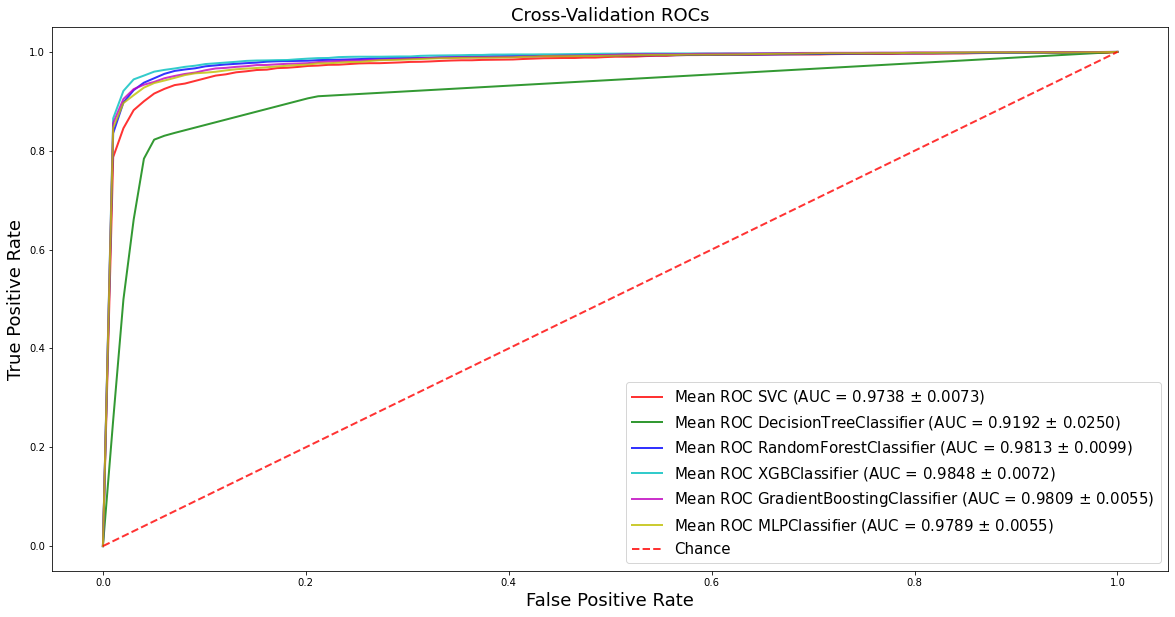

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [93]:
cv = StratifiedKFold(n_splits=10)
fig, ax = plt.subplots(figsize=(20, 10))
i = 0
mean_f = []
mean_t = []
mean_a = []
mean_s = []
accs = []
for classifier in tqdm(clfs):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    plt.figure(figsize=(10,10))
    acc = []
    for train, test in cv.split(X_nearmiss, y_nearmiss):
        probas_ = classifier.fit(X_nearmiss.iloc[train], y_nearmiss.iloc[train]).predict_proba(X_nearmiss.iloc[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_nearmiss.iloc[test], probas_[:, 1])
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        acc.append(classifier.score(X_nearmiss.iloc[test], y_nearmiss[test]))
    accs.append(acc)
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    mean_f.append(mean_fpr)
    mean_t.append(mean_tpr)
    mean_a.append(mean_auc)
    mean_s.append(std_auc)
    ax.plot(mean_fpr, mean_tpr, color=colors[i],
             label=r'Mean ROC %s (AUC = %0.4f $\pm$ %0.4f)' % (str(type(classifier)).split(".")[-1][:-2],mean_auc, std_auc),
             lw=2, alpha=.8)
    i += 1

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Chance', alpha=.8)
ax.set_xlabel('False Positive Rate',fontsize=18)
ax.set_ylabel('True Positive Rate',fontsize=18)
ax.set_title('Cross-Validation ROCs',fontsize=18)
ax.legend(loc="lower right", prop={'size': 15})
plt.show()

In [95]:
SVC_acc = accs[0]
DTC_acc = accs[1]
RFC_acc = accs[2]
XGB_acc = accs[3]
GBC_acc = accs[4]
MLP_acc = accs[5]

In [103]:
#Compute the difference between the results
diff = [y - x for y, x in zip(MLP_acc, RFC_acc)]
#Compute the mean of differences
d_bar = np.mean(diff)
#compute the variance of differences
sigma2 = np.var(diff)
#compute the number of data points used for training 
n1 = 17568
#compute the number of data points used for testing 
n2 = 1952
#compute the total number of data points
n = 19520
#compute the modified variance
sigma2_mod = sigma2 * (1/n + n2/n1)
#compute the t_static
t_static =  d_bar / np.sqrt(sigma2_mod)

In [104]:
from scipy.stats import t
#Compute p-value and plot the results 
Pvalue = ((1 - t.cdf(t_static, n-1))*200)
Pvalue

163.03187712431972

In [111]:
np.var(diff)

0.0001877540479709759

In [119]:
from scipy import stats
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(SVC_acc, XGB_acc)
print("t = " + str(t2))
print("p = " + str(p2))

t = -2.9773831289254336
p = 0.00807256041232273


In [120]:
import scikit_posthocs as sp

In [126]:
sp.posthoc_nemenyi_friedman(accs)

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.900000,0.045644,0.900000,0.900000,0.166723,0.021190,0.148392,0.900000,0.432022
1,0.900000,1.000000,0.730091,0.900000,0.900000,0.900000,0.583535,0.900000,0.900000,0.900000
2,0.045644,0.730091,1.000000,0.759402,0.103236,0.900000,0.900000,0.900000,0.207115,0.900000
3,0.900000,0.900000,0.759402,1.000000,0.900000,0.900000,0.612844,0.900000,0.900000,0.900000
4,0.900000,0.900000,0.103236,0.900000,1.000000,0.307148,0.052706,0.279939,0.900000,0.612844
5,0.166723,0.900000,0.900000,0.900000,0.307148,1.000000,0.900000,0.900000,0.495447,0.900000
6,0.021190,0.583535,0.900000,0.612844,0.052706,0.900000,1.000000,0.900000,0.117307,0.900000
7,0.148392,0.900000,0.900000,0.900000,0.279939,0.900000,0.900000,1.000000,0.464278,0.900000
8,0.900000,0.900000,0.207115,0.900000,0.900000,0.495447,0.117307,0.464278,1.000000,0.788715
9,0.432022,0.900000,0.900000,0.900000,0.612844,0.900000,0.900000,0.900000,0.788715,1.000000


In [153]:
ttest = sp.posthoc_ttest(accs)


i = 1
for j in clfs:
    name = str(type(j)).split(".")[-1][:-2]
    #print(name)
    ttest.rename(index={i: name},  columns={i: name}, inplace=True)
    i += 1

In [154]:
ttest

,SVC,DecisionTreeClassifier,RandomForestClassifier,XGBClassifier,GradientBoostingClassifier,MLPClassifier
SVC,1.000000,0.491476,0.008371,0.008073,0.000007,0.000055
DecisionTreeClassifier,0.491476,1.000000,0.071581,0.067157,0.064616,0.092037
RandomForestClassifier,0.008371,0.071581,1.000000,0.941467,0.824637,0.544074
XGBClassifier,0.008073,0.067157,0.941467,1.000000,0.755018,0.493152
GradientBoostingClassifier,0.000007,0.064616,0.824637,0.755018,1.000000,0.420513
MLPClassifier,0.000055,0.092037,0.544074,0.493152,0.420513,1.000000


In [151]:
n_f = sp.posthoc_nemenyi_friedman(np.transpose(accs))

i = 0
for j in clfs:
    name = str(type(j)).split(".")[-1][:-2]
    #print(name)
    n_f.rename(index={i: name},  columns={i: name}, inplace=True)
    i += 1

SVC
DecisionTreeClassifier
RandomForestClassifier
XGBClassifier
GradientBoostingClassifier
MLPClassifier


In [152]:
n_f

,SVC,DecisionTreeClassifier,RandomForestClassifier,XGBClassifier,GradientBoostingClassifier,MLPClassifier
SVC,1.000000,0.900000,0.001000,0.001000,0.159511,0.433820
DecisionTreeClassifier,0.900000,1.000000,0.001000,0.001000,0.121347,0.359078
RandomForestClassifier,0.001000,0.001000,1.000000,0.900000,0.542518,0.232446
XGBClassifier,0.001000,0.001000,0.900000,1.000000,0.577037,0.260903
GradientBoostingClassifier,0.159511,0.121347,0.542518,0.577037,1.000000,0.900000
MLPClassifier,0.433820,0.359078,0.232446,0.260903,0.900000,1.000000
